In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('game data.csv - game data.csv.csv')

In [3]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [4]:
df = df.drop('Days', axis = 1)

In [5]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [6]:
x = df.drop('Wear Jacket?', axis =1)
y = df[['Wear Jacket?']]

In [7]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [8]:
y

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes
5,No
6,No
7,No


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
from pandas.core.dtypes.common import is_numeric_dtype

In [11]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [12]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] = le.fit_transform(x[col])

In [13]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier()

In [18]:
dt.fit(x,y)

DecisionTreeClassifier()

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = Outlook'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Temprature'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Temprature'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Outlook'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Outlook'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Temprature'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Outlook')]

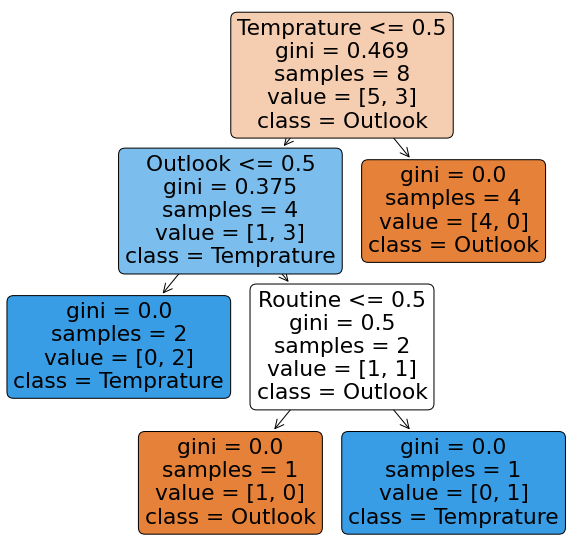

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
tree.plot_tree(dt, filled = True, rounded = True, feature_names= x.columns, class_names= x.columns.unique())

In [26]:
dt.predict([[1, 0, 0]])  # sunny cold indoor

array(['No'], dtype=object)